In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

print("Shape of dataset is {}".format(dataset.shape))

2024-04-17 19:10:33.038799: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 19:10:33.038957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 19:10:33.257267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Shape of dataset is (8693, 14)


In [3]:
dataset.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: xlabel='Transported'>

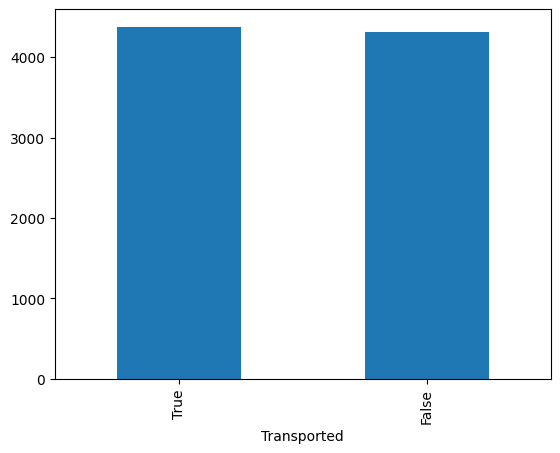

In [6]:
plot_data = dataset.Transported.value_counts()
plot_data.plot(kind="bar")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='VRDeck', ylabel='Count'>

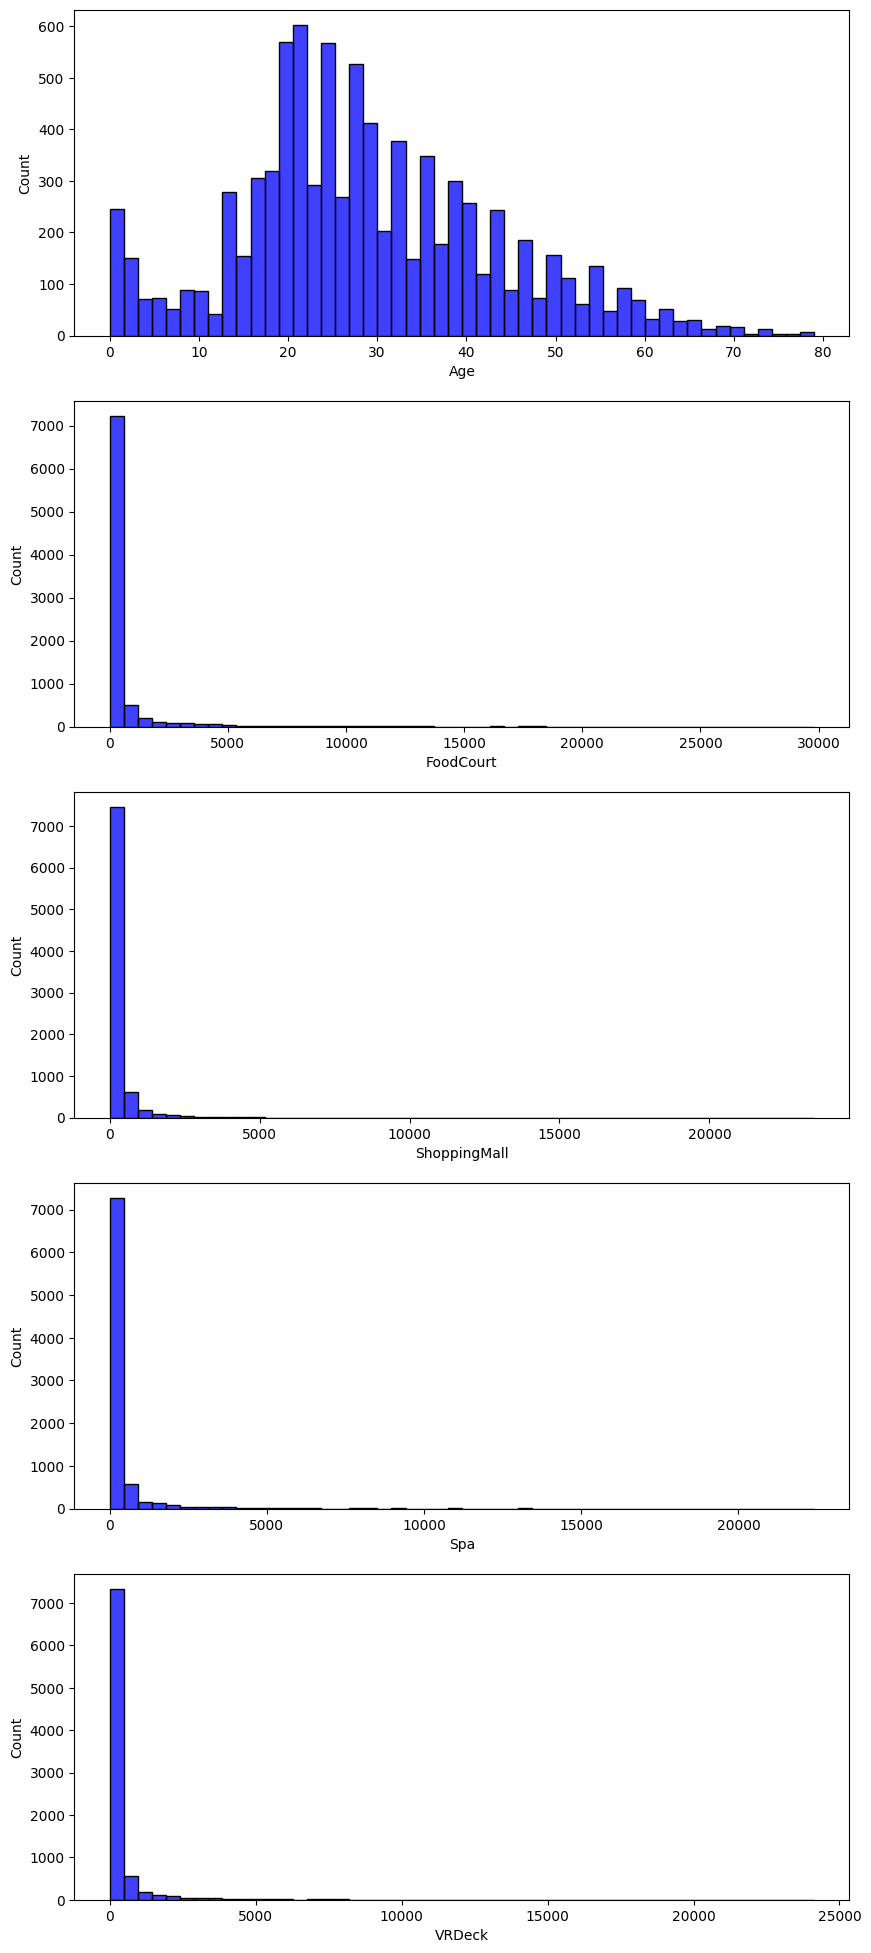

In [7]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
plt.subplots_adjust(top=2)

sns.histplot(dataset['Age'], color='b', bins=50, ax=ax[0])
sns.histplot(dataset['FoodCourt'], color='b', bins=50, ax=ax[1])
sns.histplot(dataset['ShoppingMall'], color='b', bins=50, ax=ax[2])
sns.histplot(dataset['Spa'], color='b', bins=50, ax=ax[3])
sns.histplot(dataset['VRDeck'], color='b', bins=50, ax=ax[4])

In [8]:
dataset = dataset.drop(['PassengerId', 'Name'], axis=1)
dataset.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [9]:
dataset.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [10]:
dataset[["CryoSleep" ,"ShoppingMall","VIP", 'FoodCourt', "VRDeck", "Spa"]]= dataset[["CryoSleep" ,"ShoppingMall","VIP", 'FoodCourt', "VRDeck", "Spa"]].fillna(value=0)

In [11]:
label = "Transported"
dataset[label] = dataset[label].astype(int)

In [12]:
dataset["CryoSleep"] = dataset["CryoSleep"].astype(int)
dataset["VIP"] = dataset["VIP"].astype(int)

In [13]:
dataset[["Deck", "Cabin_num", "Side"]] = dataset["Cabin"].str.split("/", expand=True)

In [14]:
dataset.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [15]:
try:
    dataset = dataset.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [16]:
def random_split(dataset, test_ratio = 0.2):
    indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~indices], dataset[indices]

train_data, test_data = random_split(dataset)
train_data = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=label)
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label=label)
    

In [17]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [18]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1")

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpy7n0ov1n as temporary training directory


In [19]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=['accuracy'])

Use /tmp/tmpfwti8h97 as temporary training directory


In [20]:
rf.fit(x=train_data)

Reading training dataset...
Training dataset read in 0:00:07.796991. Found 6932 examples.
Training model...


[INFO 24-04-17 19:11:51.4133 UTC kernel.cc:1233] Loading model from path /tmp/tmpfwti8h97/model/ with prefix 04b59c82895244ad


Model trained in 0:00:50.762891
Compiling model...


[INFO 24-04-17 19:11:52.7609 UTC decision_forest.cc:660] Model loaded with 300 root(s), 227670 node(s), and 13 input feature(s).
[INFO 24-04-17 19:11:52.7610 UTC abstract_model.cc:1344] Engine "RandomForestGeneric" built
[INFO 24-04-17 19:11:52.7610 UTC kernel.cc:1061] Use fast generic engine


Model compiled.


In [21]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx = 0, max_depth = 3)

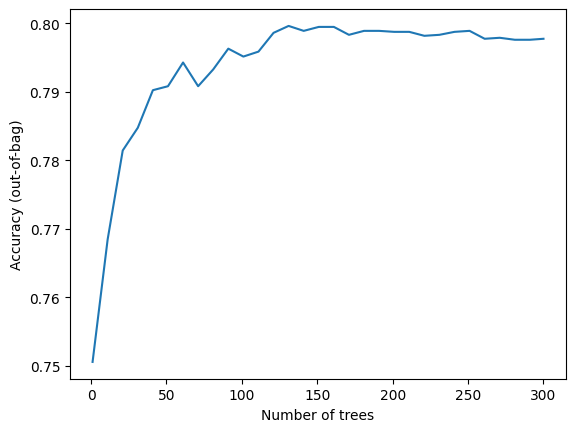

In [22]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [23]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6932, accuracy=0.7977495672244662, loss=0.5159889365103987, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [24]:
evaluation = rf.evaluate(x=test_data, return_dict=True)
for name, value in evaluation.items():
    print(f"{name}:{value:.4f}")

2/2 [==============================] - 8s 77ms/step - loss: 0.0000e+00 - accuracy: 0.7939
loss:0.0000
accuracy:0.7939


In [25]:
print(f"Available variable importancw")
for imp in inspector.variable_importances().keys():
    print("\t", imp)

Available variable importancw
	 SUM_SCORE
	 NUM_NODES
	 NUM_AS_ROOT
	 INV_MEAN_MIN_DEPTH


In [26]:
inspector.variable_importances()['SUM_SCORE']

[("Cabin_num" (4; #1), 242004.83167993813),
 ("CryoSleep" (1; #2), 134941.3253367293),
 ("Spa" (1; #10), 115109.62366766675),
 ("RoomService" (1; #7), 101481.18730275362),
 ("VRDeck" (1; #12), 97212.18834786367),
 ("Deck" (4; #3), 87275.7268561272),
 ("Age" (1; #0), 78421.48560207227),
 ("FoodCourt" (1; #5), 77582.84516960476),
 ("HomePlanet" (4; #6), 55939.300691611366),
 ("ShoppingMall" (1; #8), 51698.610928836046),
 ("Destination" (4; #4), 16729.554378797562),
 ("Side" (4; #9), 16544.985281875786),
 ("VIP" (1; #11), 328.03366338368505)]

In [27]:
inspector.variable_importances()['NUM_AS_ROOT']

[("CryoSleep" (1; #2), 116.0),
 ("RoomService" (1; #7), 63.0),
 ("Spa" (1; #10), 62.0),
 ("VRDeck" (1; #12), 37.0),
 ("ShoppingMall" (1; #8), 9.0),
 ("FoodCourt" (1; #5), 8.0),
 ("HomePlanet" (4; #6), 3.0),
 ("Deck" (4; #3), 2.0)]

In [28]:
test_data_given = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submit_id = test_data_given.PassengerId

In [29]:
test_data_given[['VIP', 'CryoSleep']] = test_data_given[['VIP', 'CryoSleep']].fillna(value=0)
test_data_given[["Deck", "Cabin_num", "Side"]] = test_data_given["Cabin"].str.split("/", expand=True)
try:
    test_data_given = test_data_given.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")
    
test_data_given["CryoSleep"] = test_data_given["CryoSleep"].astype(int)
test_data_given["VIP"] = test_data_given["VIP"].astype(int)

test_data_given_tf = tfdf.keras.pd_dataframe_to_tf_dataset(test_data_given)

predictions = rf.predict(test_data_given_tf)
num_pred = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submit_id,
                       'Transported': num_pred.squeeze()})

output.head()

5/5 [==============================] - 1s 76ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [30]:
sample_sumit = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")
sample_sumit['Transported'] = num_pred
sample_sumit.to_csv("/kaggle/working/submission.csv", index=False)
sample_sumit.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
